In [121]:
import ctypes
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import time as time
import os
import csv
from scipy.signal import butter, sosfilt
from scipy.signal import hilbert
import pandas as pd
from scipy.signal import argrelextrema

In [122]:
from scipy.signal import savgol_filter

# Define Savitzky-Golay filter function
def savgol_filter_func(data, window_length, polyorder):
    return savgol_filter(data, window_length, polyorder)

In [325]:
all_csv_data = pd.read_csv("../logs/exp_5/Pico_data/trial_3_7_16_rachel/rachel3.txt",skiprows=1, sep='\s+').to_numpy()

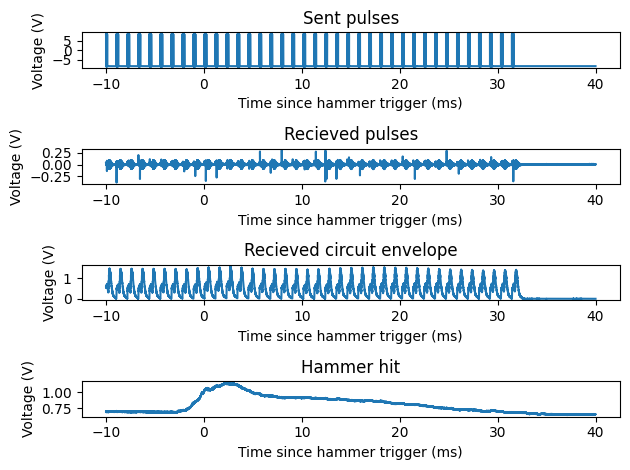

In [345]:
csv_times = all_csv_data[:,0]
csv_square_pulses = all_csv_data[:,1]
csv_recieved_pulses = all_csv_data[:,2]
csv_circuit_envelope =  all_csv_data[:,3]
csv_hammer = all_csv_data[:,4]

plt.figure()
plt.subplot(4,1,1)
plt.plot(csv_times,csv_square_pulses)
plt.title("Sent pulses")
plt.xlabel("Time since hammer trigger (ms)")
plt.ylabel("Voltage (V)")

plt.subplot(4,1,2)
plt.plot(csv_times,csv_recieved_pulses)
plt.title("Recieved pulses")
plt.xlabel("Time since hammer trigger (ms)")
plt.ylabel("Voltage (V)")

plt.subplot(4,1,3)
plt.plot(csv_times,csv_circuit_envelope)
plt.title("Recieved circuit envelope")
plt.xlabel("Time since hammer trigger (ms)")
plt.ylabel("Voltage (V)")

plt.subplot(4,1,4)
plt.plot(csv_times,csv_hammer)
plt.title("Hammer hit")
plt.xlabel("Time since hammer trigger (ms)")
plt.ylabel("Voltage (V)")

plt.subplots_adjust(hspace = 0.5)
plt.tight_layout()

Text(0, 0.5, 'Voltage (V)')

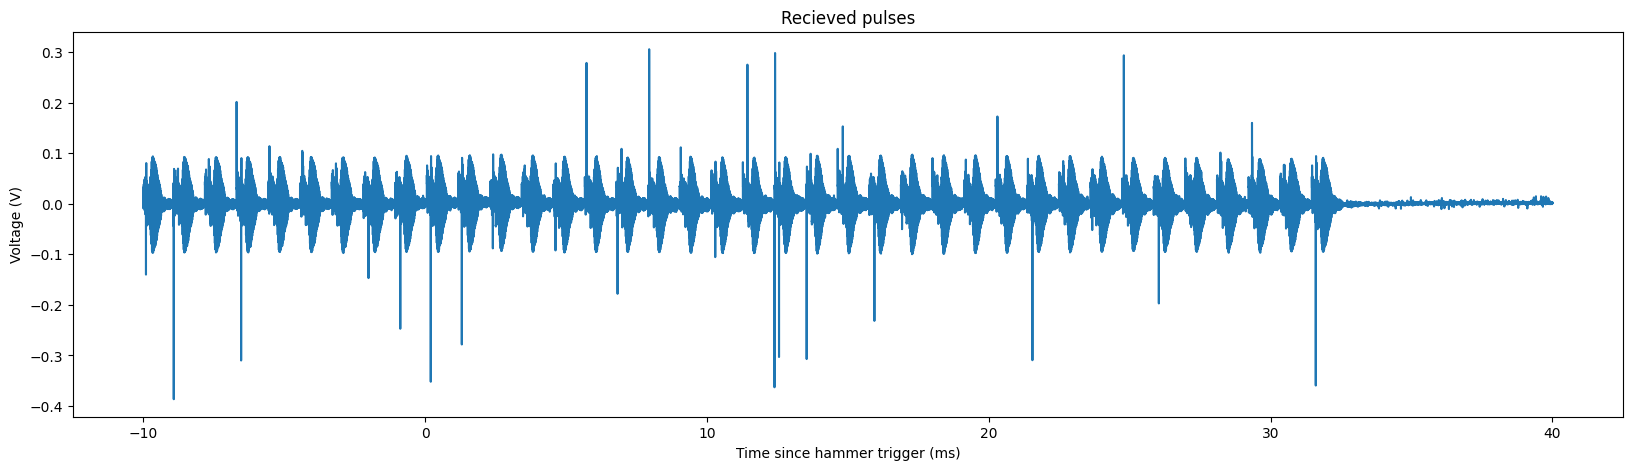

In [346]:
plt.figure(figsize=(20,5))
plt.plot(csv_times,csv_recieved_pulses)
plt.title("Recieved pulses")
plt.xlabel("Time since hammer trigger (ms)")
plt.ylabel("Voltage (V)")

In [347]:
from scipy.signal import find_peaks

def find_maxima_envelope(signal, sampling_rate, approx_frequency):
    """
    Find the envelope of a signal by identifying local maxima and connecting them with lines.

    Parameters:
    signal (numpy.ndarray): The input signal.
    sampling_rate (float): The sampling rate of the signal in Hz.
    approx_frequency (float): The approximate frequency of the signal in Hz.

    Returns:
    numpy.ndarray: The envelope of the input signal.
    """
    # Calculate the minimum distance between peaks in samples
    min_distance = int(sampling_rate / (approx_frequency/2))

    # Find the indices of the local maxima with the specified minimum distance
    peaks, _ = find_peaks(signal, distance=min_distance)

    # Get the values of the signal at the local maxima
    maxima = signal[peaks]

    # Interpolate between maxima to create the envelope
    envelope = np.interp(np.arange(len(signal)), peaks, maxima)

    return envelope


In [348]:
from scipy.signal import medfilt

use_raw_envelope = False

filtered_recieved_pulses = []
calculated_envelope = []

if (use_raw_envelope):
    kernel_size = 3
    window_length = 30
    polyorder = 10
    filtered_recieved_pulses = medfilt(csv_recieved_pulses, kernel_size)
    # filtered_recieved_pulses = savgol_filter(csv_recieved_pulses, window_length, polyorder)

    lowest_freq_of_recieved_sig = 20000 # needs to be much lower than 52 kHz -- this is what determines the distance between points on the envelope
    osc_sampling_freq = 200000
    calculated_envelope = find_maxima_envelope(filtered_recieved_pulses, osc_sampling_freq, lowest_freq_of_recieved_sig)

else: 

    Filter_lowcut =40000
    Filter_highcut =60000
    Filter_order = 4
    Sampling_frequency=1000/(all_csv_data[1,0]-all_csv_data[0,0]) # in Hz, since time is in ms
    sos = butter(Filter_order, [Filter_lowcut, Filter_highcut], btype='bandpass', fs=Sampling_frequency, output='sos')


    filtered_recieved_pulses = np.apply_along_axis(lambda x: sosfilt(sos, x), axis=0, arr = csv_recieved_pulses)

    calculated_envelope = np.abs(hilbert(filtered_recieved_pulses, axis=0))


Text(0.5, 0, 'Time since hammer trigger (ms)')

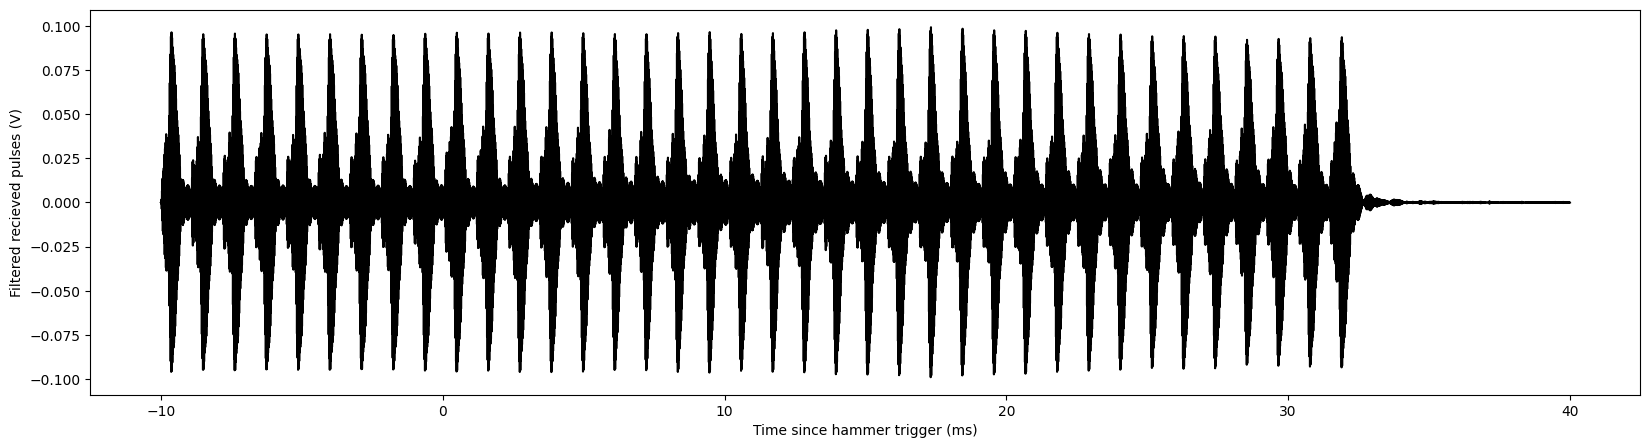

In [349]:
plt.figure(figsize=(20,5))
plt.plot(csv_times,filtered_recieved_pulses,'k')
plt.ylabel('Filtered recieved pulses (V)')
plt.xlabel('Time since hammer trigger (ms)')

# plt.xlim((0,80))

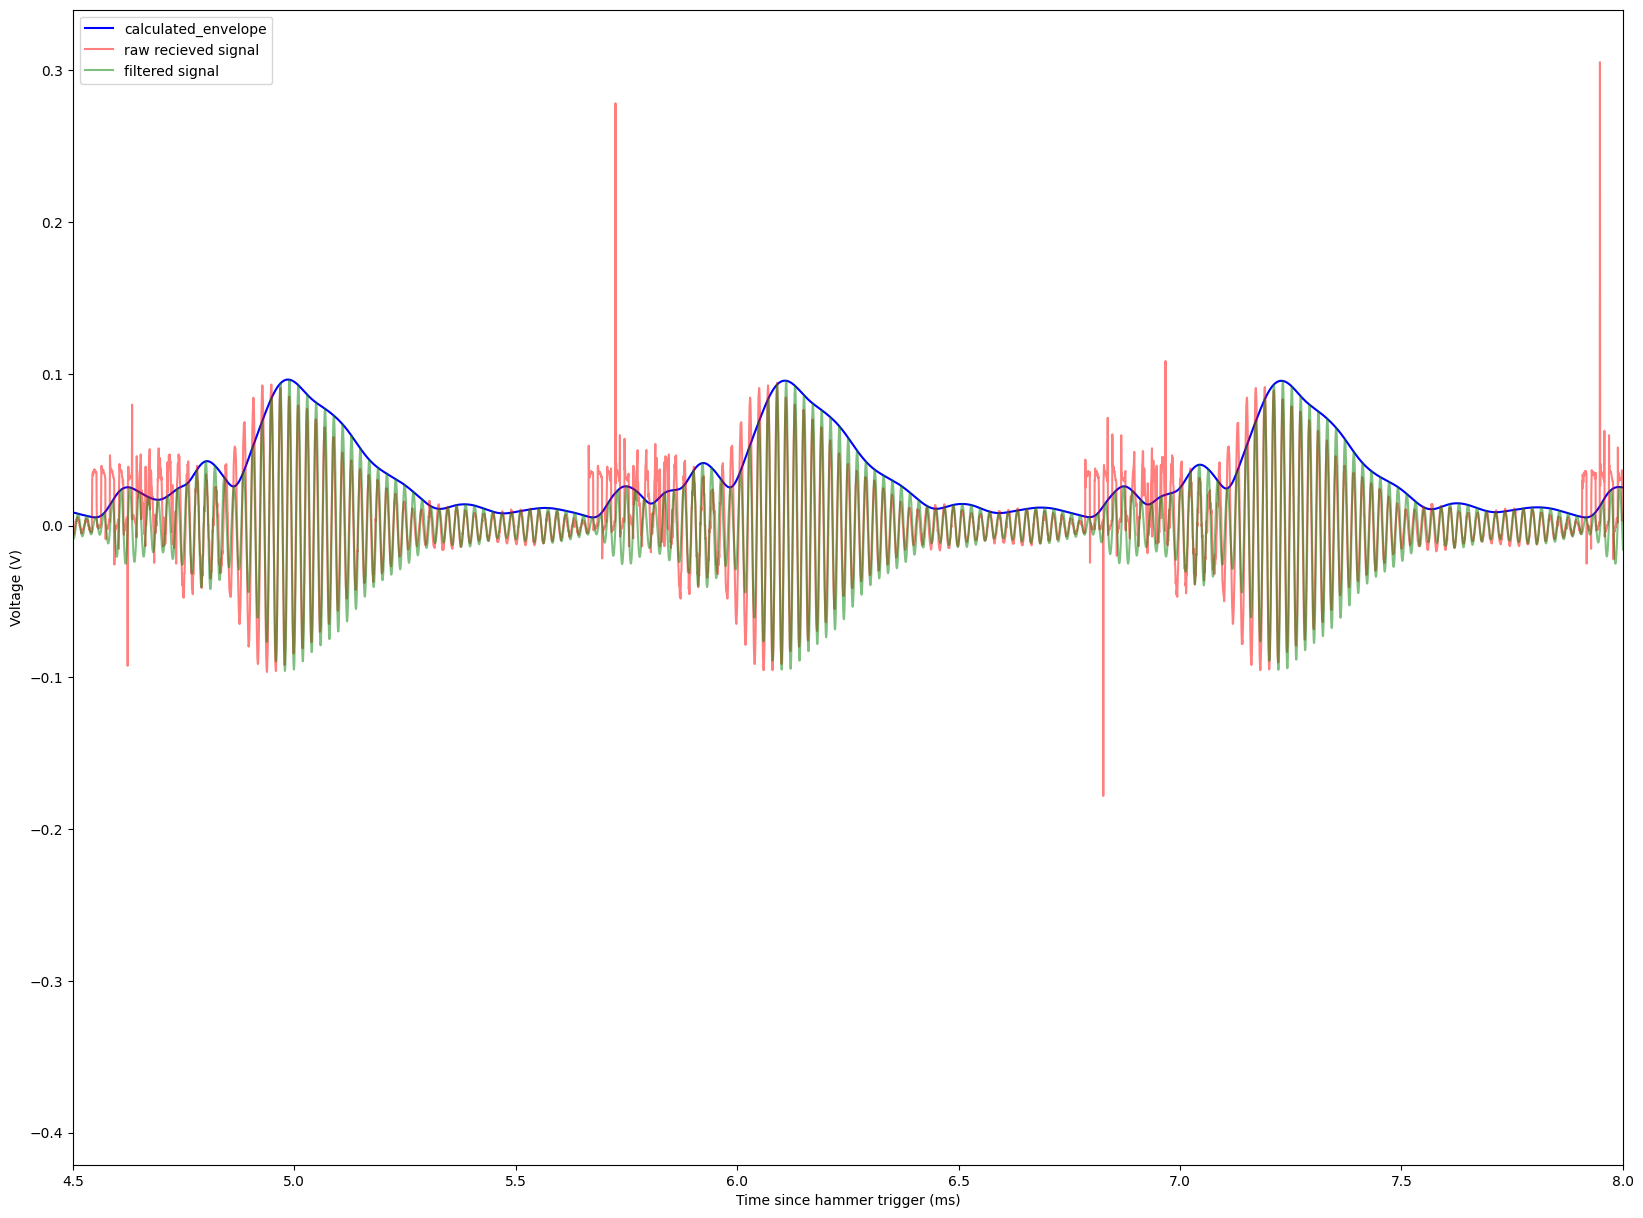

In [350]:
plt.figure(figsize=(20,15))
plt.plot(csv_times, calculated_envelope, label="calculated_envelope", color = "blue")
plt.plot(csv_times, csv_recieved_pulses, label="raw recieved signal", color = "red", alpha = 0.5)
plt.plot(csv_times, filtered_recieved_pulses,label="filtered signal", color = "green", alpha = 0.5)
plt.ylabel('Voltage (V)')
plt.xlabel('Time since hammer trigger (ms)')
plt.xlim((4.5,8))
plt.legend()

(-11.0, 4.0)

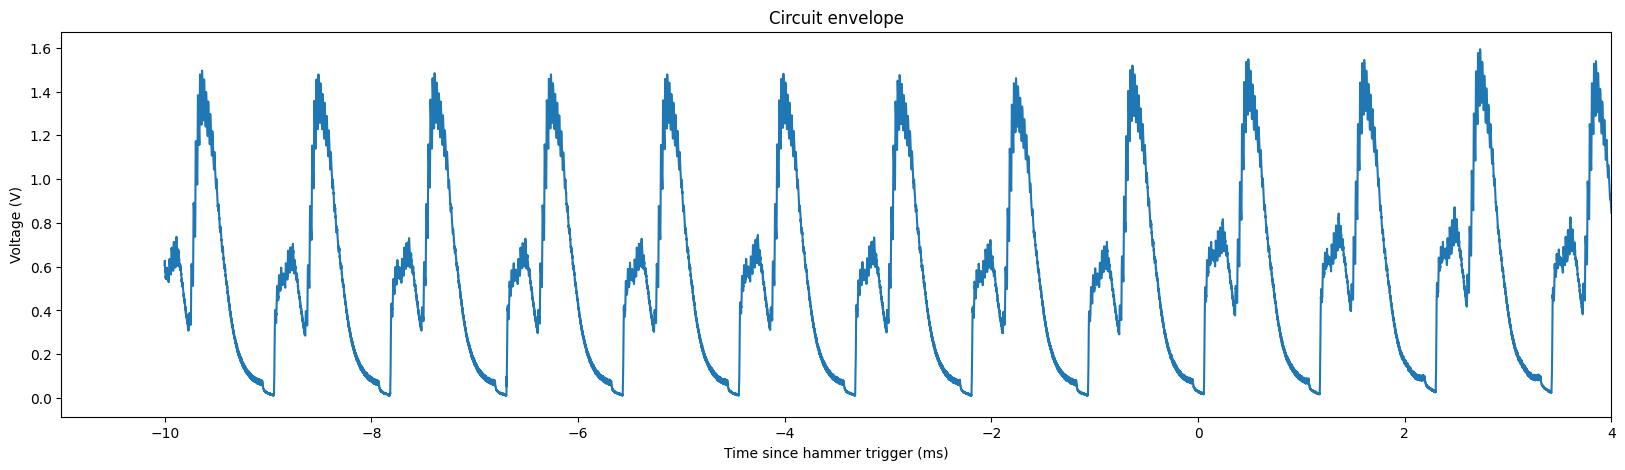

In [351]:
plt.figure(figsize=(20,5))
plt.plot(csv_times,csv_circuit_envelope)
plt.title("Circuit envelope")
plt.xlabel("Time since hammer trigger (ms)")
plt.ylabel("Voltage (V)")
plt.xlim((-11,4))

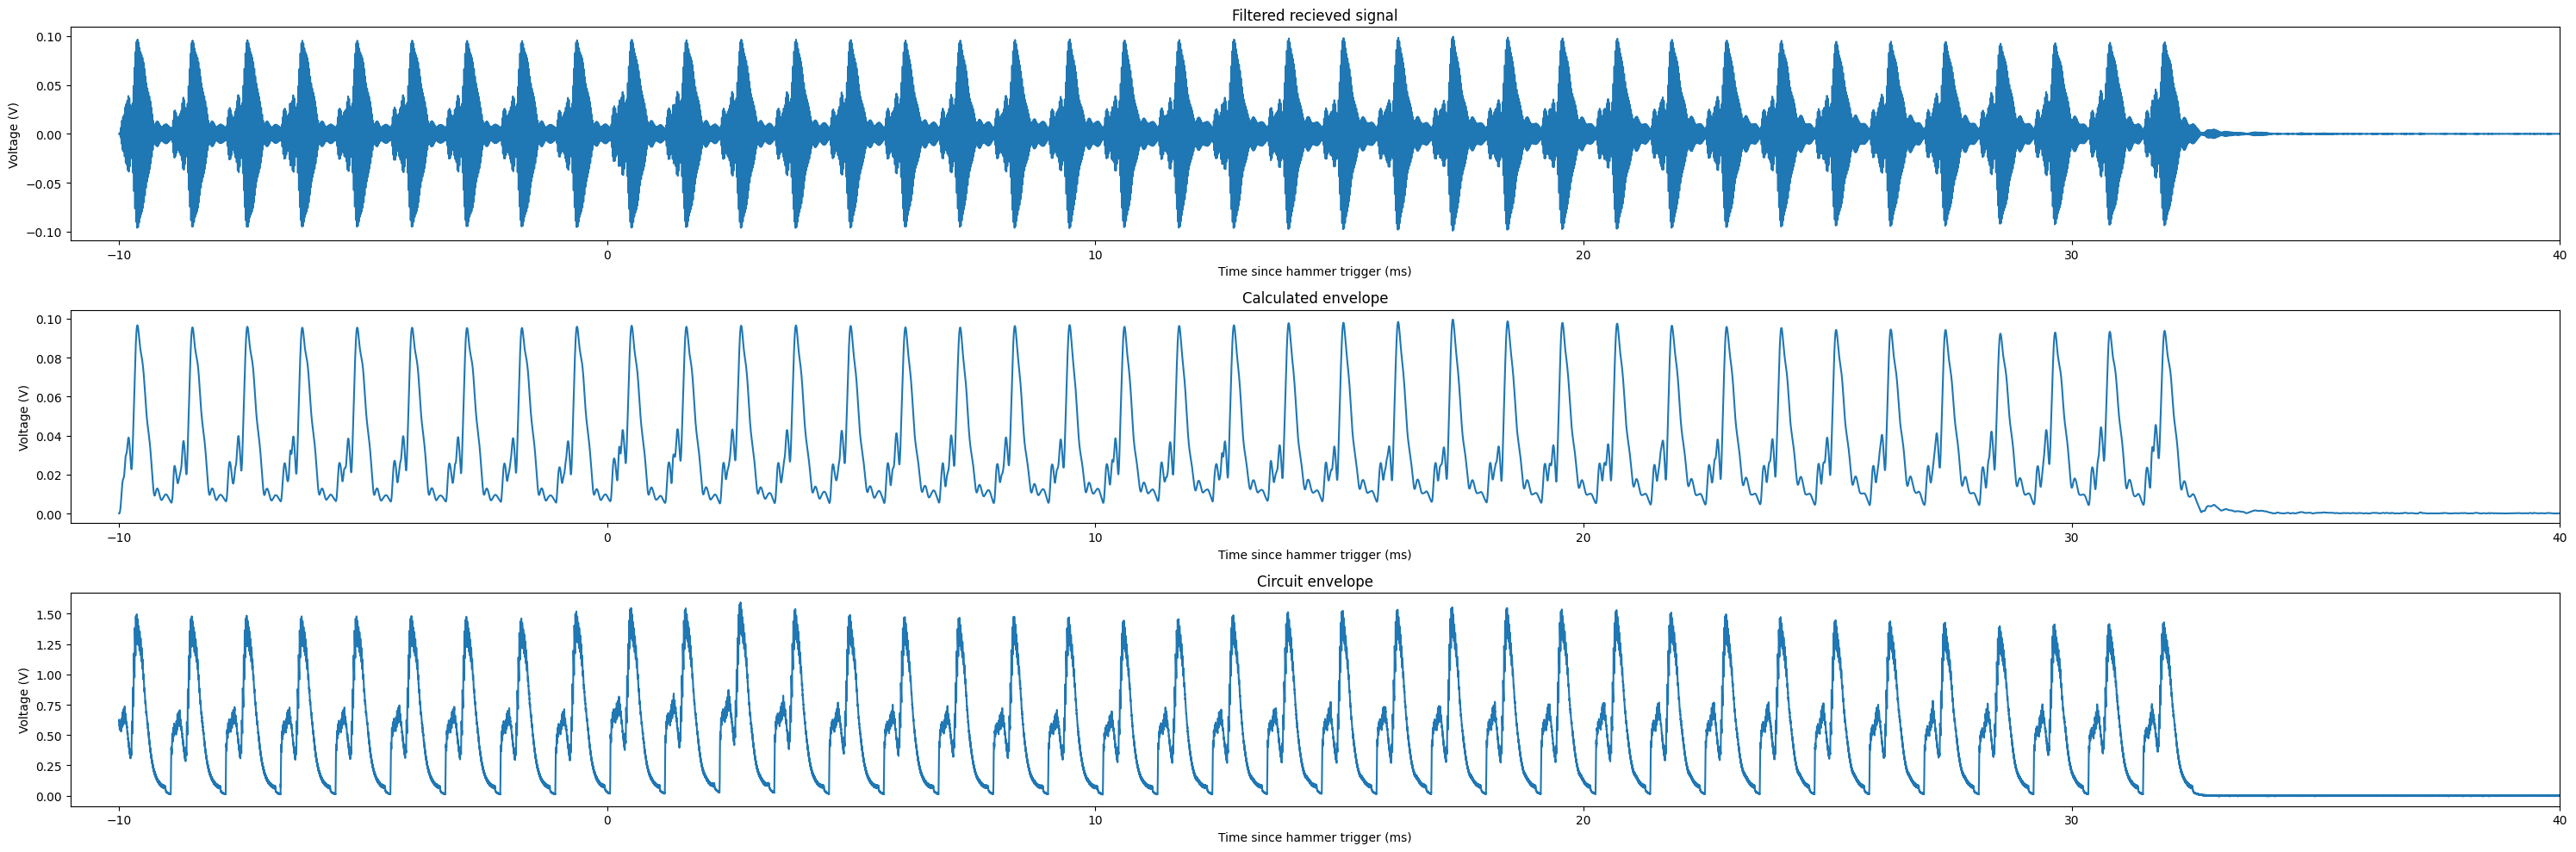

In [352]:
min_time = -11
max_time = 40

plt.figure(figsize=(30,10))
plt.subplot(3,1,1)
plt.plot(csv_times,filtered_recieved_pulses)
plt.title("Filtered recieved signal")
plt.xlabel("Time since hammer trigger (ms)")
plt.ylabel("Voltage (V)")
plt.xlim((min_time,max_time))

plt.subplot(3,1,2)
plt.plot(csv_times,calculated_envelope)
plt.title("Calculated envelope")
plt.xlabel("Time since hammer trigger (ms)")
plt.ylabel("Voltage (V)")
plt.xlim((min_time,max_time))

plt.subplot(3,1,3)
plt.plot(csv_times,csv_circuit_envelope)
plt.title("Circuit envelope")
plt.xlabel("Time since hammer trigger (ms)")
plt.ylabel("Voltage (V)")
plt.xlim((min_time,max_time))

plt.subplots_adjust(hspace = 0.5)
plt.tight_layout()

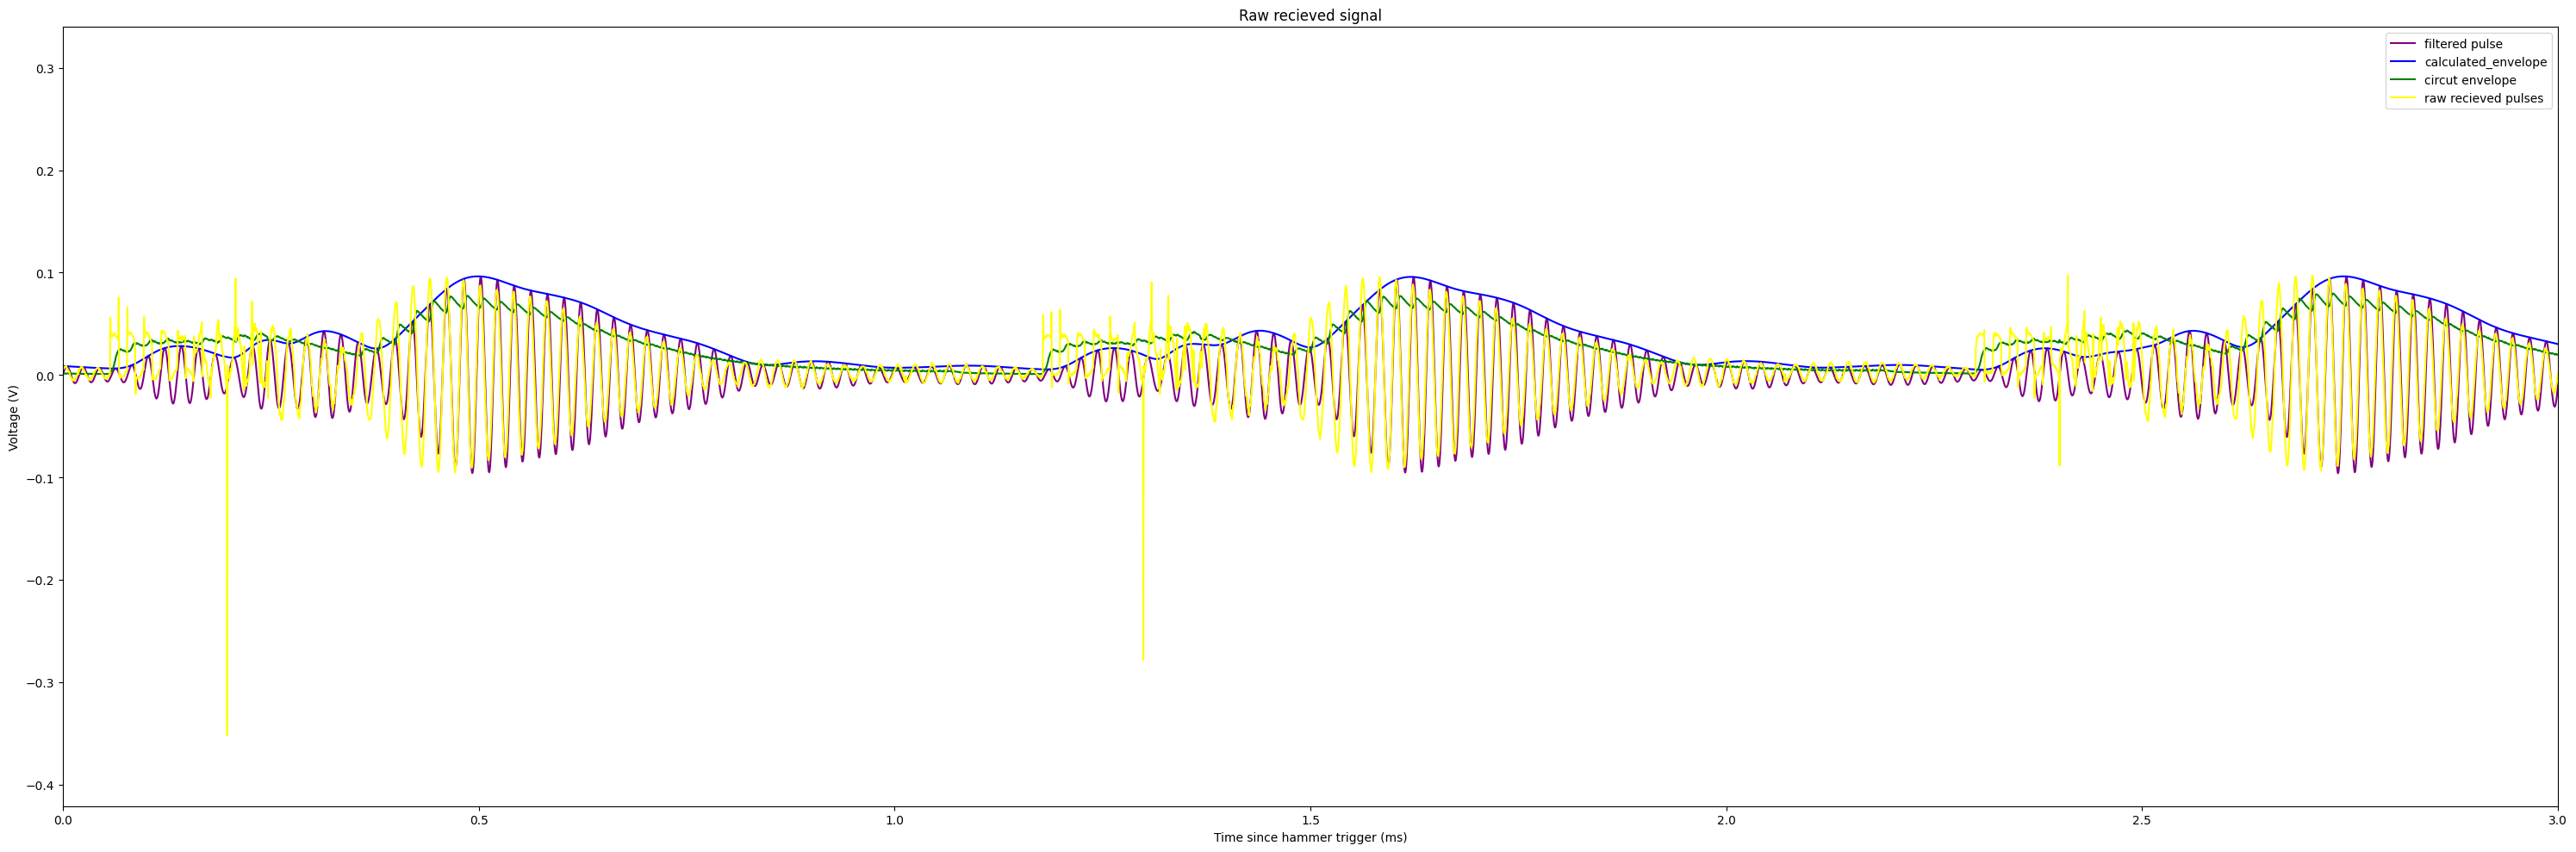

In [353]:
min_time = 0
max_time = 3

plt.figure(figsize=(30,10))
plt.plot(csv_times,filtered_recieved_pulses, label="filtered pulse", color = "purple")
plt.title("Filtered recieved signal")
plt.xlabel("Time since hammer trigger (ms)")
plt.ylabel("Voltage (V)")
plt.xlim((min_time,max_time))

plt.plot(csv_times,calculated_envelope, label = "calculated_envelope", color = "blue")
plt.title("Calculated envelope")
plt.xlabel("Time since hammer trigger (ms)")
plt.ylabel("Voltage (V)")
plt.xlim((min_time,max_time))

plt.plot(csv_times,csv_circuit_envelope * 1/20, label = "circut envelope", color = "green")
plt.title("Circuit envelope")
plt.xlabel("Time since hammer trigger (ms)")
plt.ylabel("Voltage (V)")
plt.xlim((min_time,max_time))

plt.plot(csv_times,csv_recieved_pulses, label = "raw recieved pulses", color = "yellow")
plt.title("Raw recieved signal")
plt.xlabel("Time since hammer trigger (ms)")
plt.ylabel("Voltage (V)")
plt.xlim((min_time,max_time))

plt.subplots_adjust(hspace = 0.5)
plt.tight_layout()
plt.legend()

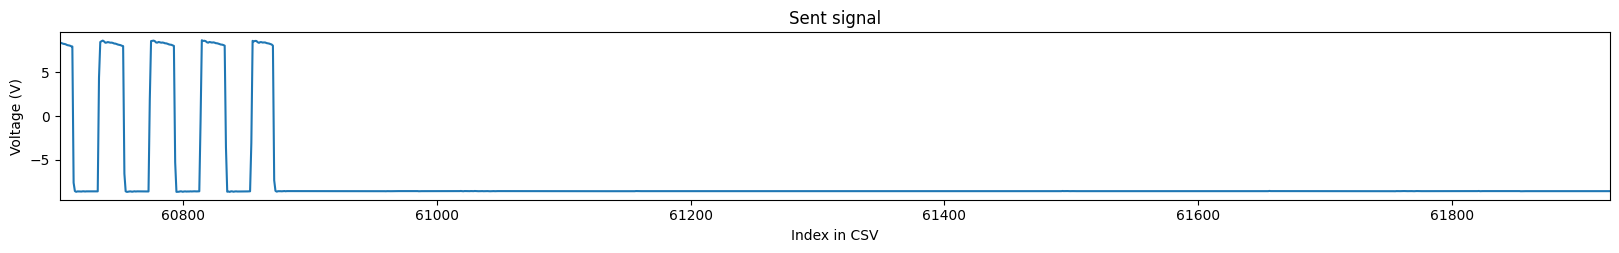

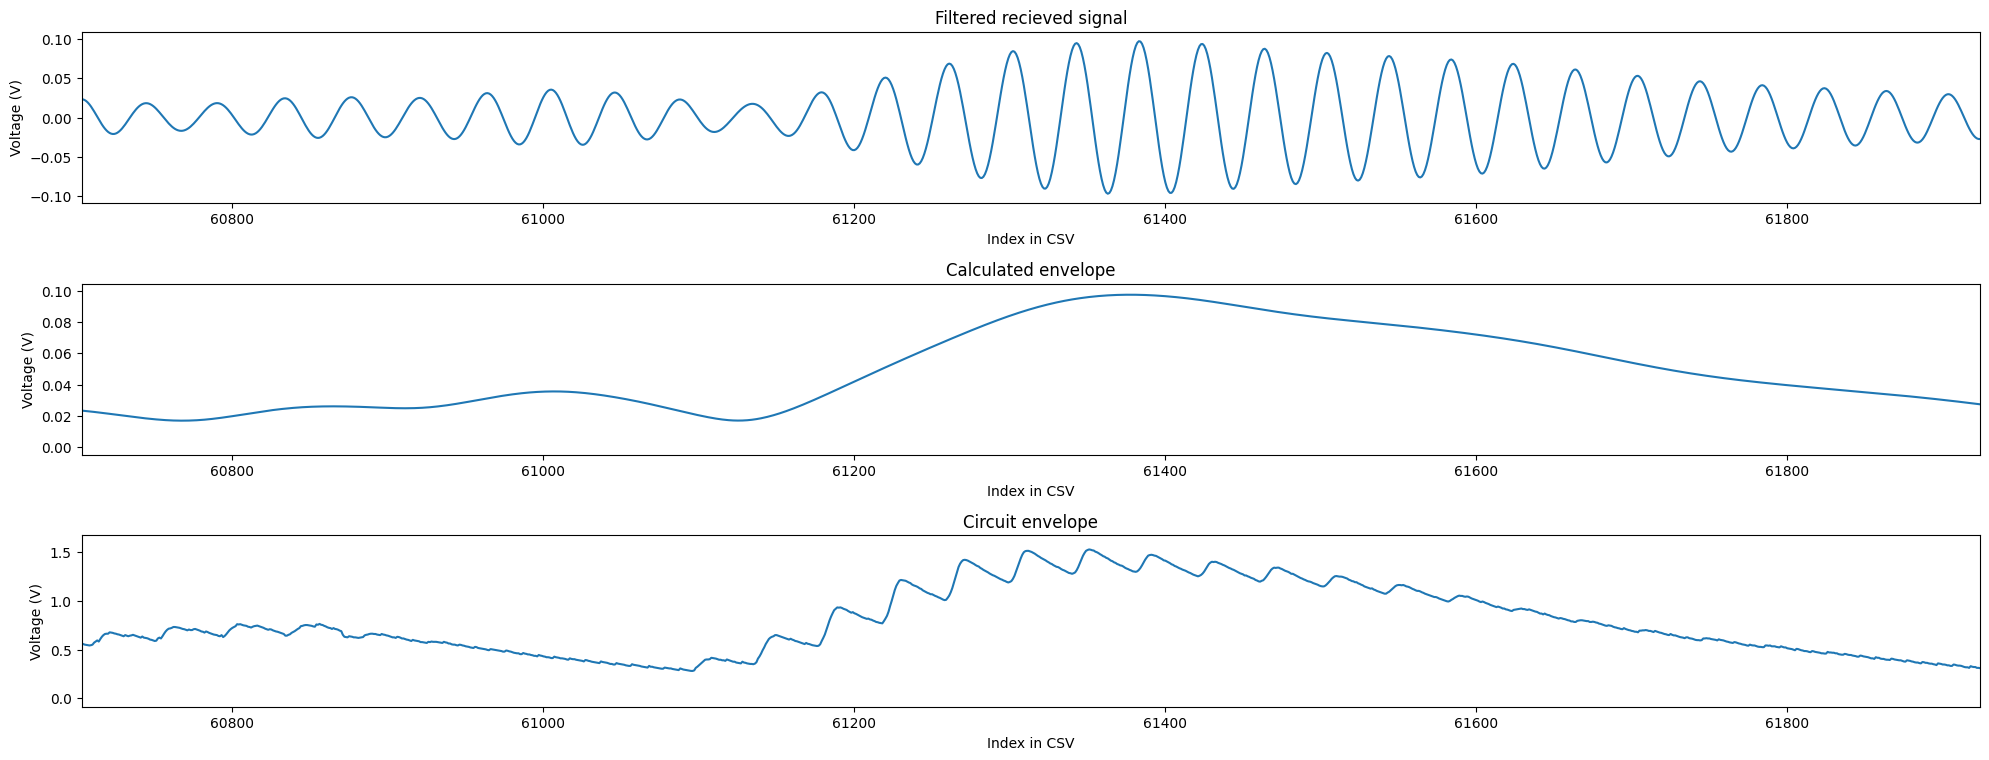

In [354]:
min_index = 60703
max_index = 61924

# min_index = 2375
#max_index = 3500

'''
Ruth Trials: Achilles
Trial 1:
x1=710
x2=2954
Trial 3:
x1=505
x2=2748
Trial 4:
x1=608
x2=2852
Trial 5:
x1=653
x2=2896
'''
''' 
Rachel Trials: Achilles
Trial 1:
x1=1775
x2=4017
Trial 2:
x1=170
x2=2413
Trial 3:
x1=2100
x2=4343
Trial 4:
x1=642
x2=2885
Trial 5:
x1=900
x2=3143
Trial 6: 
x1=1990
x2=4233

Rachel Trials No circuit (Exp 6):
Trial 1:
x1 = 3350
x2 = 5350
Trial 2:
x1 = 3240
x2 = 4740
Trial 3:
x1 = 2520
x2 = 4020
Trial 4:
x1 = 2735
x2 = 4240
Trial 5:
x1 = 2675
x2 = 4175

Rachel Trials Circuit (Exp 6):
Trial 1:

'''

plt.figure(figsize=(20,10))
plt.subplot(4,1,1)
plt.plot(csv_square_pulses)
plt.title("Sent signal")
plt.xlabel("Index in CSV")
plt.ylabel("Voltage (V)")
plt.xlim((min_index,max_index))

plt.figure(figsize=(20,10))
plt.subplot(4,1,2)
plt.plot(filtered_recieved_pulses)
plt.title("Filtered recieved signal")
plt.xlabel("Index in CSV")
plt.ylabel("Voltage (V)")
plt.xlim((min_index,max_index))

plt.subplot(4,1,3)
plt.plot(calculated_envelope)
plt.title("Calculated envelope")
plt.xlabel("Index in CSV")
plt.ylabel("Voltage (V)")
plt.xlim((min_index,max_index))

plt.subplot(4,1,4)
plt.plot(csv_circuit_envelope)
plt.title("Circuit envelope")
plt.xlabel("Index in CSV")
plt.ylabel("Voltage (V)")
plt.xlim((min_index,max_index))

plt.subplots_adjust(hspace = 0.5)
plt.tight_layout()

In [355]:
max_index - min_index

1221

2254


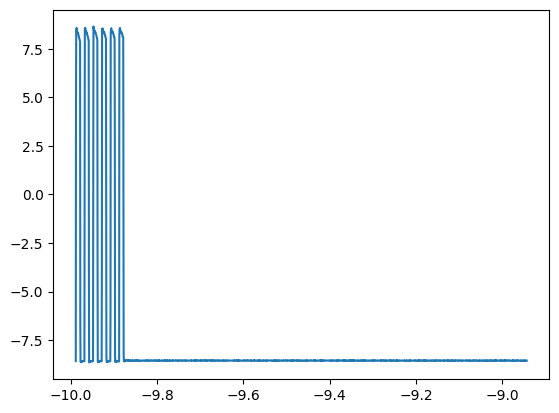

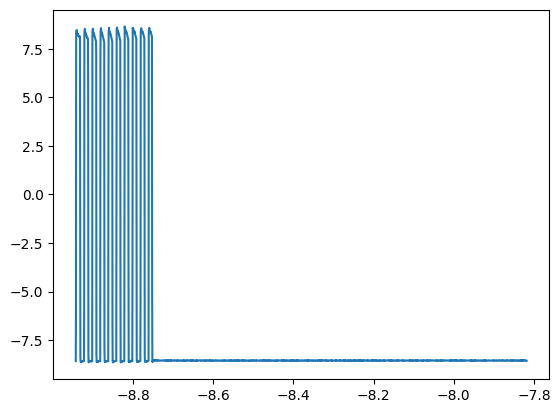

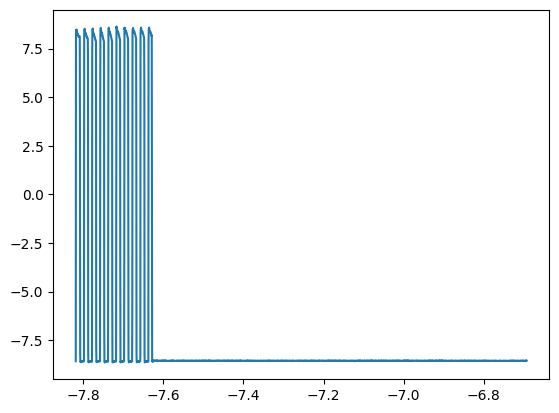

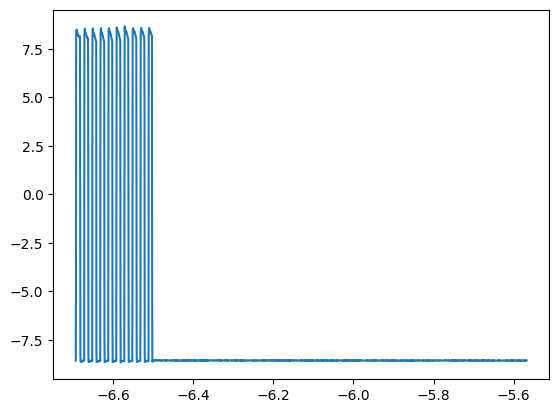

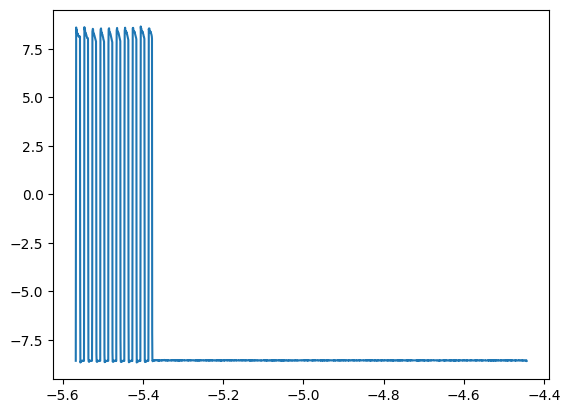

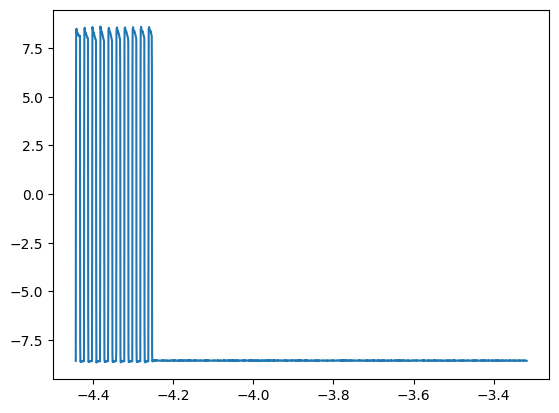

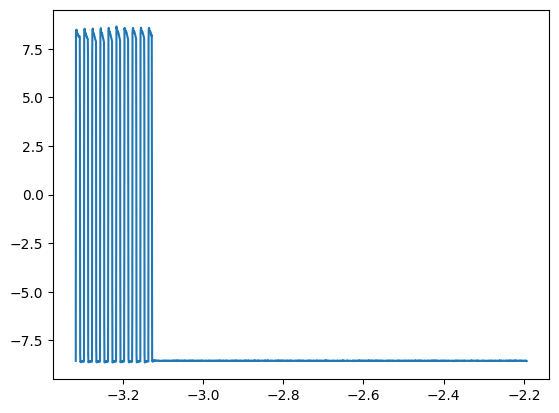

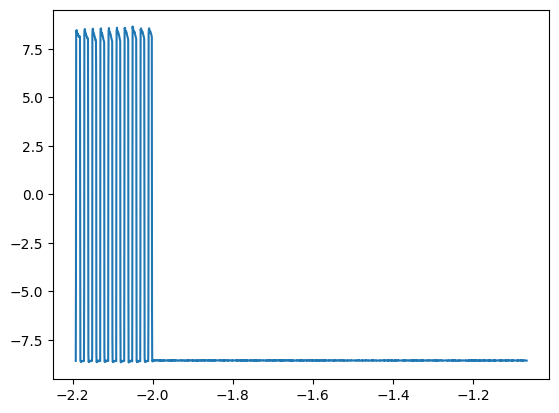

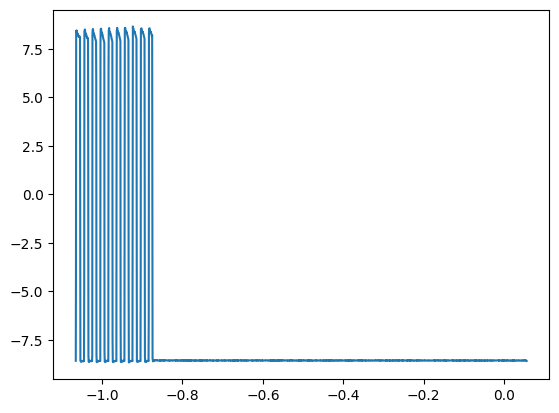

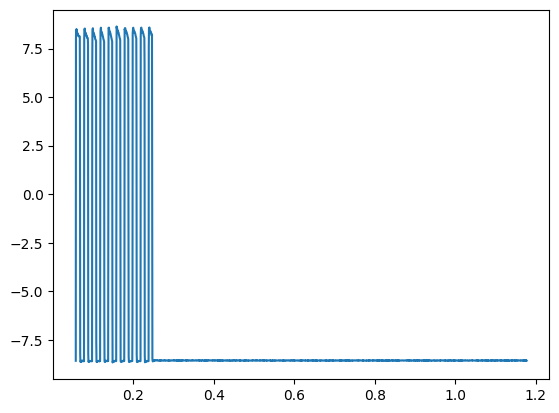

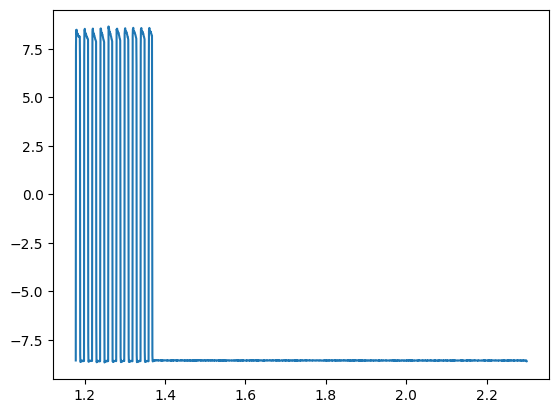

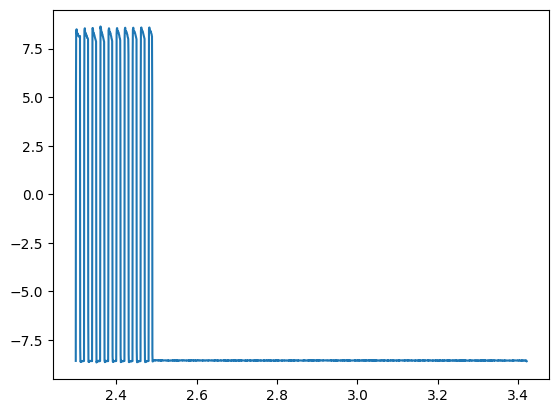

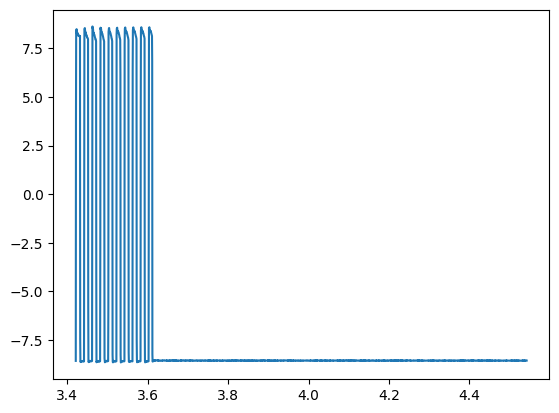

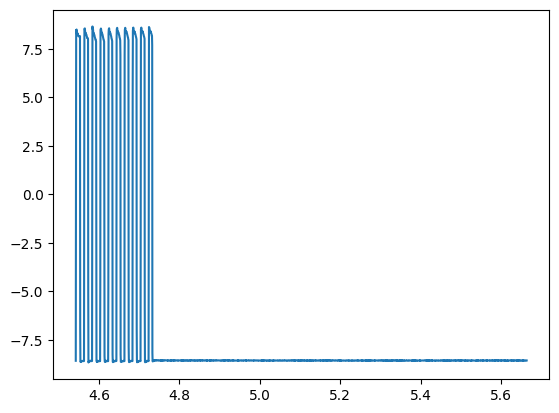

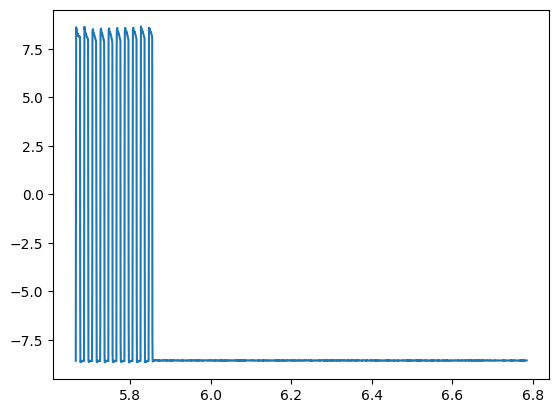

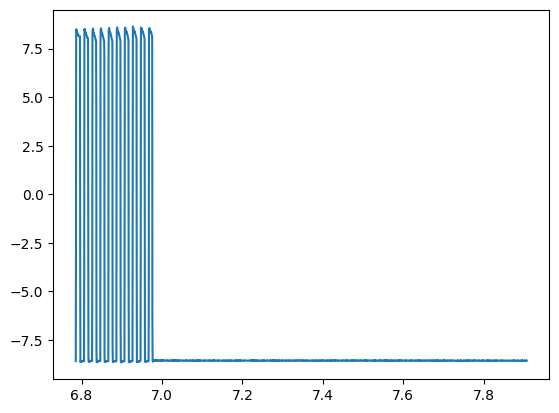

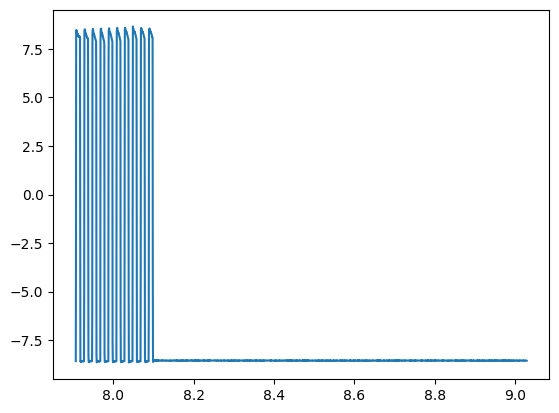

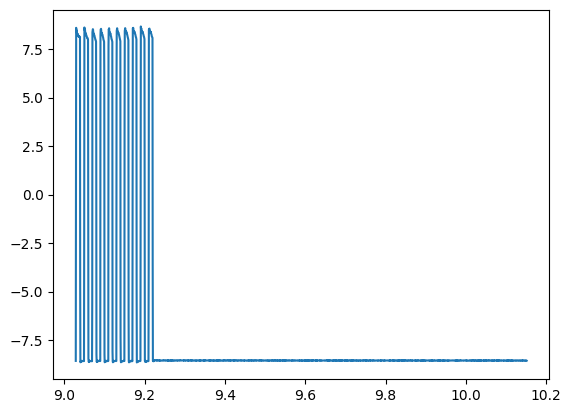

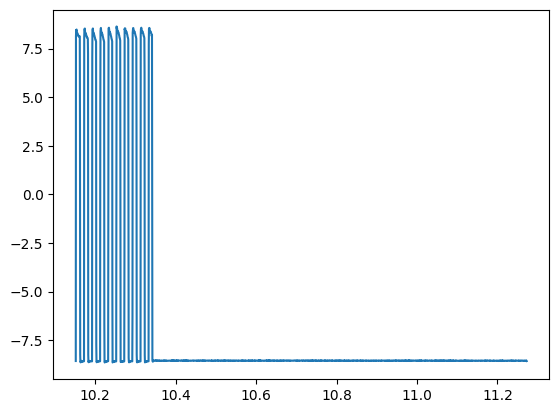

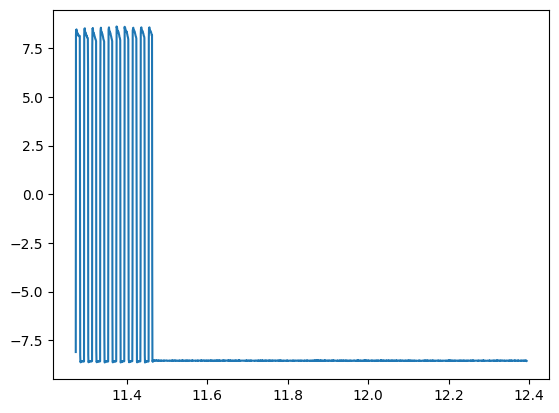

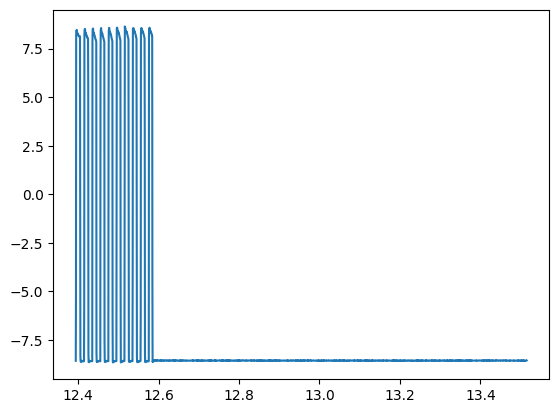

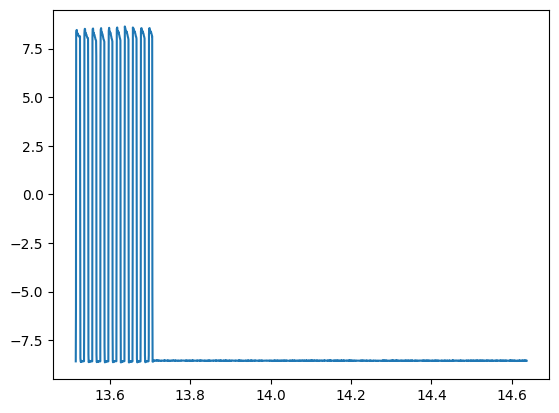

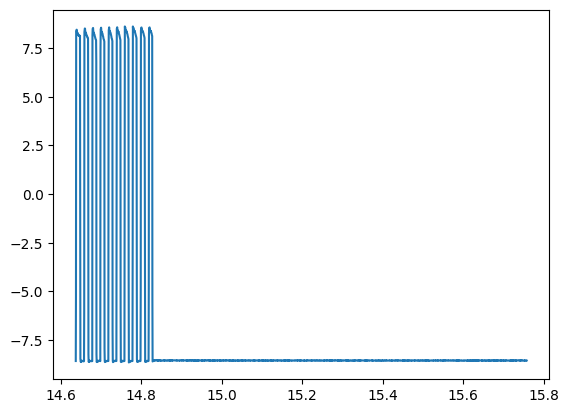

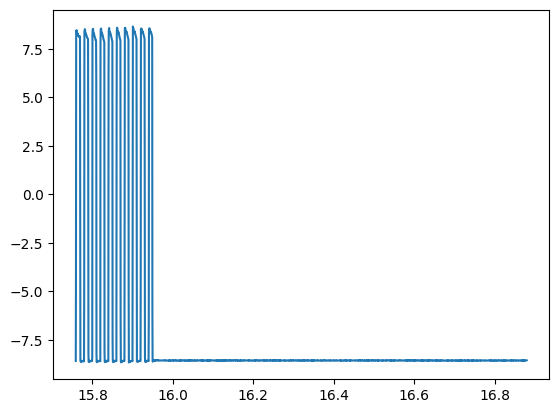

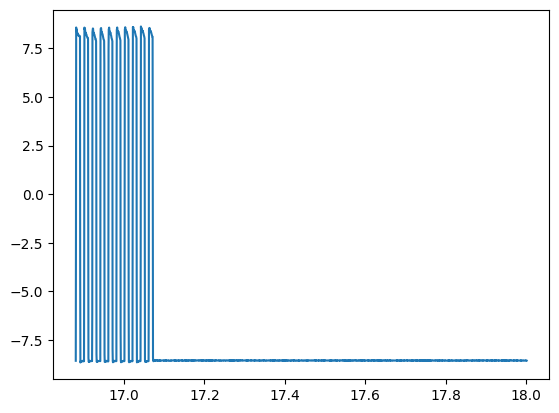

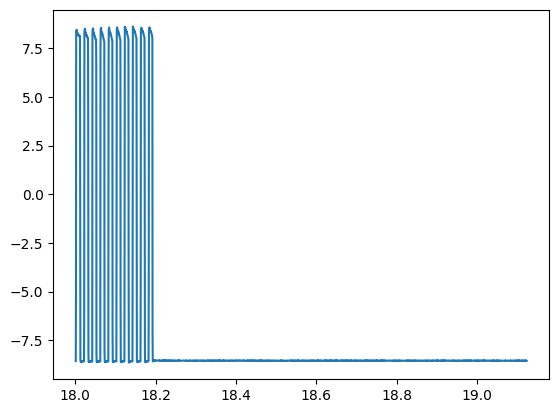

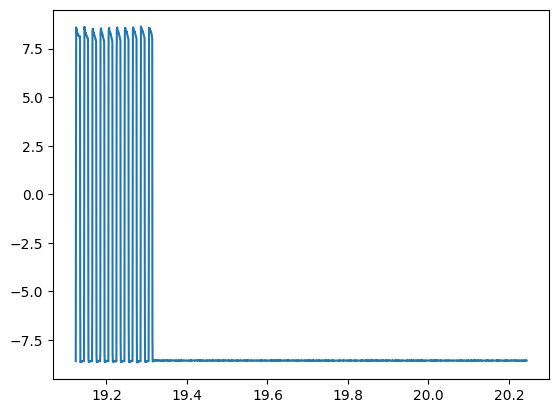

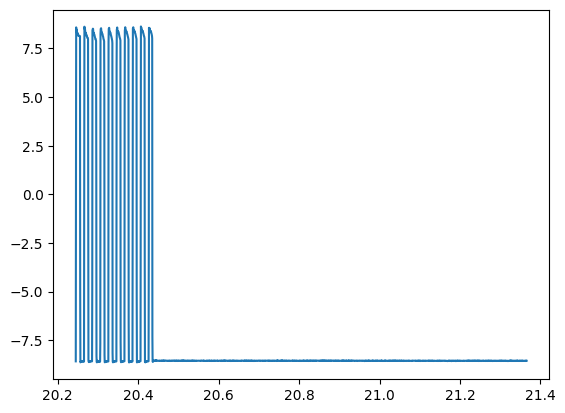

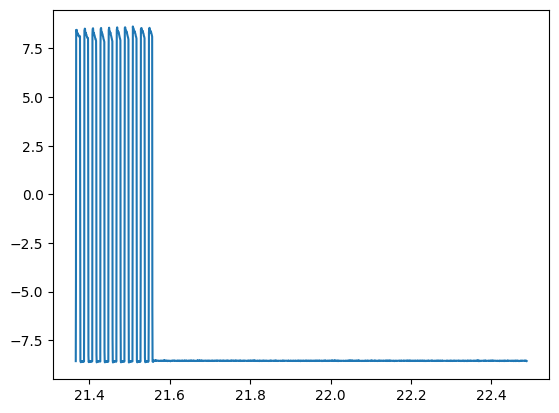

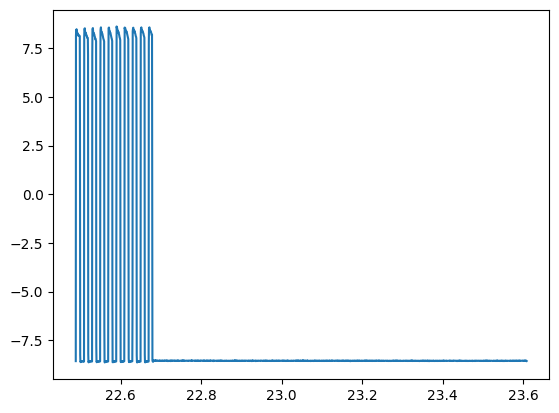

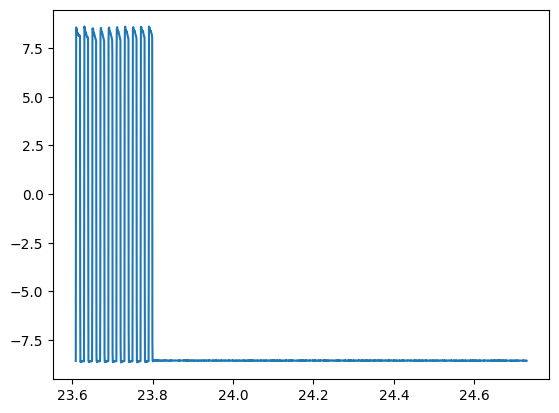

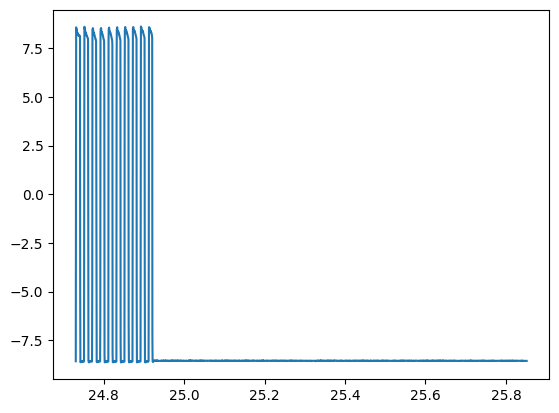

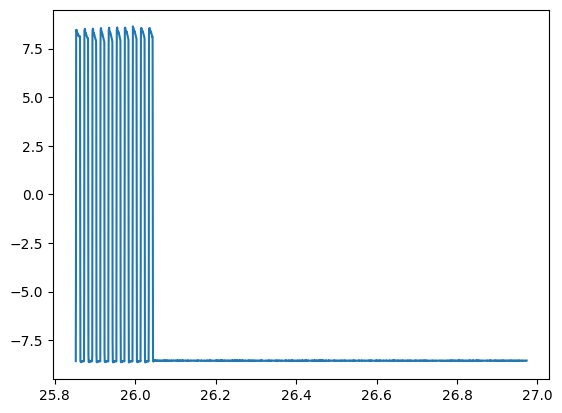

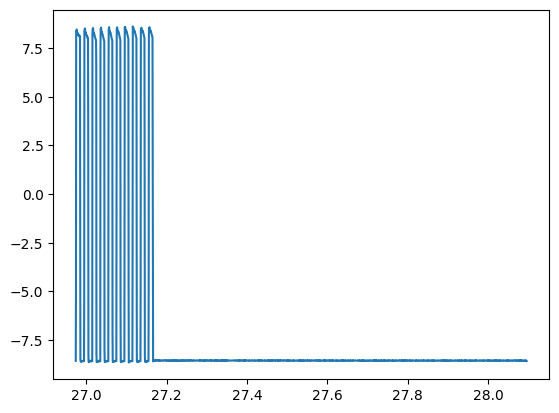

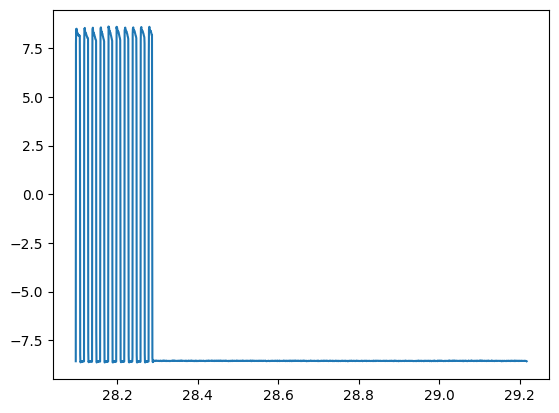

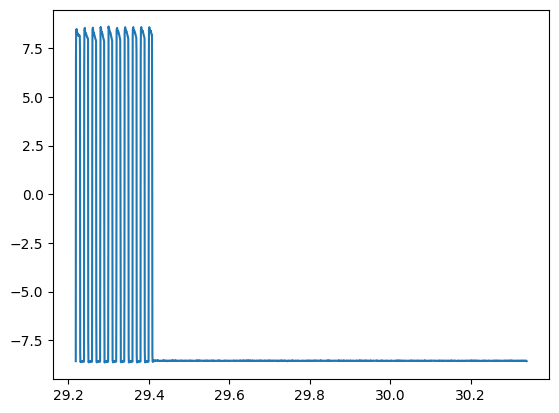

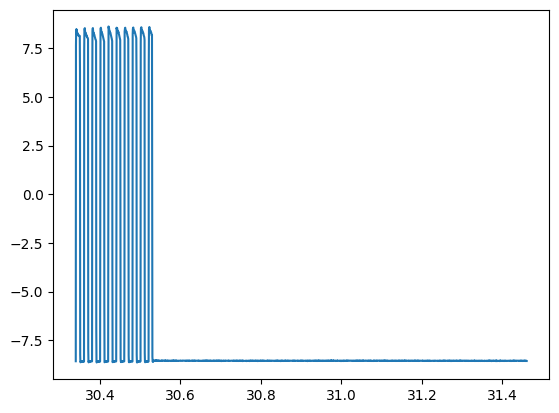

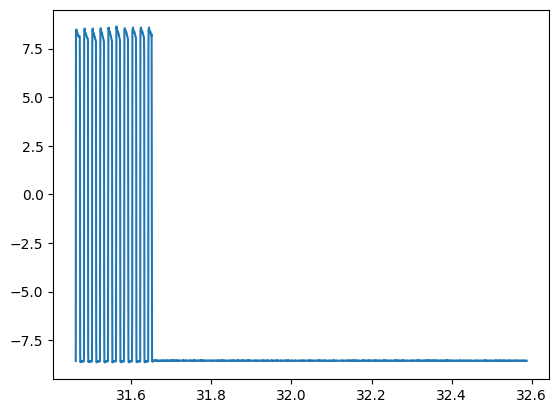

In [397]:
################################ New reshaping code to account for big changes in periods btw pulses
NUM_PULSES = 38

### Find the start of each pulse
total_start_indicies =  np.zeros(NUM_PULSES, dtype=np.int64)

i = 0
r = 0
tr = -7
max_pulse_length_in_indicies = 0
while i < (len(csv_square_pulses) - 1):
    if (csv_square_pulses[i] < tr and csv_square_pulses[i+1] >= tr):
        # print(f"{r}, {i}, {csv_square_pulses[i]}, {csv_square_pulses[i+1]}")
        total_start_indicies[r] = i
        if (r > 0):
            max_pulse_length_in_indicies = max(max_pulse_length_in_indicies, total_start_indicies[r] - total_start_indicies[r-1])
        r += 1
        i += 500
    i+=1
print(max_pulse_length_in_indicies)

######## Reshaped arrays . shorter pulses padded with the last data point.
times_reshaped = np.zeros((NUM_PULSES, max_pulse_length_in_indicies))
square_pulses_reshaped = np.zeros((NUM_PULSES, max_pulse_length_in_indicies))
calculated_envelope_reshaped = np.zeros((NUM_PULSES, max_pulse_length_in_indicies))
circuit_envelope_reshaped = np.zeros((NUM_PULSES, max_pulse_length_in_indicies))

r = 0
for s in range(len(total_start_indicies)):
    this_start = total_start_indicies[s]
    next_start = len(csv_times) - 1
    if (s + 1 < len(total_start_indicies)): next_start = total_start_indicies[s+1]

    for c in range(max_pulse_length_in_indicies):
        if (c + this_start < next_start):
            times_reshaped[r][c] = csv_times[c + this_start]
            square_pulses_reshaped[r][c] = csv_square_pulses[c + this_start]
            calculated_envelope_reshaped[r][c] = calculated_envelope[c + this_start]
            circuit_envelope_reshaped[r][c] = csv_circuit_envelope[c + this_start]
        else:
            times_reshaped[r][c] = csv_times[next_start - 1]
            square_pulses_reshaped[r][c] = csv_square_pulses[next_start - 1]
            calculated_envelope_reshaped[r][c] = calculated_envelope[next_start - 1]
            circuit_envelope_reshaped[r][c] = csv_circuit_envelope[next_start - 1]

    r += 1

start = np.zeros(NUM_PULSES)

for r in range(NUM_PULSES):
    plt.plot(times_reshaped[r], square_pulses_reshaped[r])
    plt.show()


In [398]:
points_per_col = 2000

square_pulses_reshaped_cut = np.zeros((NUM_PULSES - 1,points_per_col))
calculated_envelope_reshaped_cut = np.zeros((NUM_PULSES - 1,points_per_col))
circuit_envelope_reshaped_cut = np.zeros((NUM_PULSES - 1,points_per_col))
time_ticks = []
    
for i in range(NUM_PULSES - 1):
    # For each pulse, only save certain columns (2000 data points after the start of the pulse burst)
    square_pulses_reshaped_cut[i,: ] = square_pulses_reshaped[i, start[i].astype(int) : start[i].astype(int) + points_per_col]
    calculated_envelope_reshaped_cut[i,:] = calculated_envelope_reshaped[i,start[i].astype(int):start[i].astype(int)+points_per_col]
    circuit_envelope_reshaped_cut[i,:] = circuit_envelope_reshaped[i,start[i].astype(int):start[i].astype(int)+points_per_col]
    time_ticks.append(round(times_reshaped[i, start[i].astype(int)], 2)) # Start time of each pulse


print(time_ticks)

[-9.99, -8.94, -7.82, -6.69, -5.57, -4.44, -3.32, -2.19, -1.07, 0.06, 1.18, 2.3, 3.42, 4.54, 5.66, 6.79, 7.91, 9.03, 10.15, 11.27, 12.39, 13.52, 14.64, 15.76, 16.88, 18.0, 19.12, 20.24, 21.37, 22.49, 23.61, 24.73, 25.85, 26.97, 28.1, 29.22, 30.34]


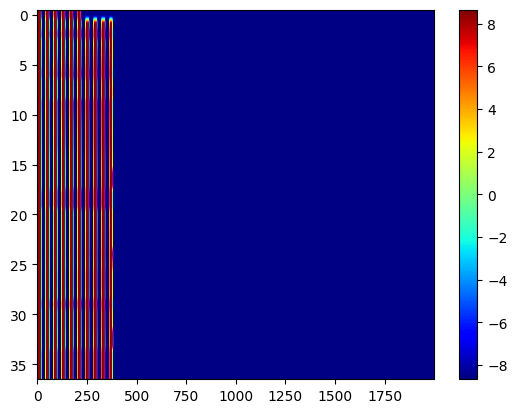

In [399]:
plt.imshow( square_pulses_reshaped_cut, aspect='auto', cmap='jet')
plt.colorbar()

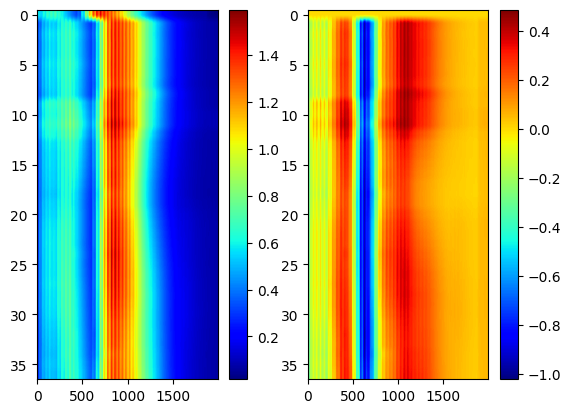

In [400]:
plt.subplot(1,2,1)
plt.imshow(circuit_envelope_reshaped_cut, aspect='auto', cmap='jet')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(circuit_envelope_reshaped_cut-circuit_envelope_reshaped_cut[0,:], aspect='auto', cmap='jet')

plt.colorbar()


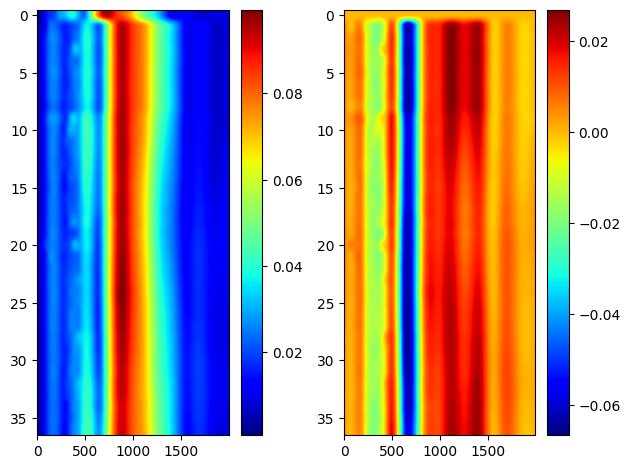

In [401]:
plt.subplot(1,2,1)
plt.imshow(calculated_envelope_reshaped_cut, aspect='auto', cmap='jet')
plt.colorbar()
plt.subplot(1,2,2)

plt.imshow(calculated_envelope_reshaped_cut-calculated_envelope_reshaped_cut[0,:], aspect='auto', cmap='jet')
plt.colorbar()

plt.tight_layout()


In [402]:
def find_outliers_iqr(data):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Calculate lower and upper boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    lower_outliers = data[data < lower_bound]
    upper_outliers = data[data > upper_bound]
    
    return lower_outliers, upper_outliers, lower_bound, upper_bound

def find_outliers_std(data, threshold=3):
    # Calculate the mean and standard deviation
    mean = np.mean(data)
    std_dev = np.std(data)
    
    # Determine the lower and upper bounds
    lower_bound = mean - threshold * std_dev
    upper_bound = mean + threshold * std_dev
    
    # Find outliers
    lower_outliers = data[data < lower_bound]
    upper_outliers = data[data > upper_bound]
    
    return lower_outliers, upper_outliers, lower_bound, upper_bound

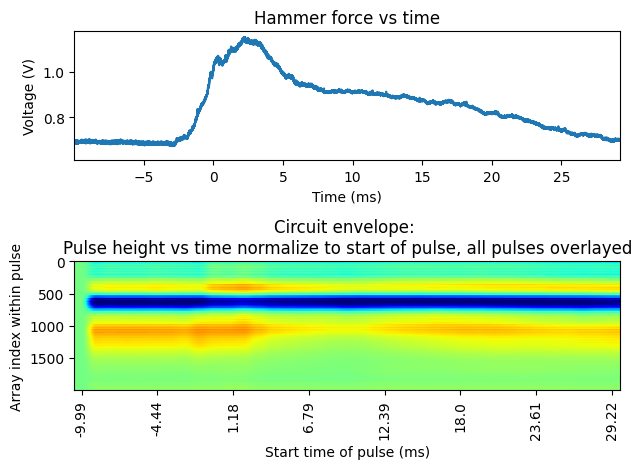

In [403]:
plt.subplot(2,1,1)
plt.plot(csv_times,csv_hammer)
these_ticks = time_ticks[0::5]
plt.xlim(these_ticks[0], these_ticks[-1])
plt.title('Hammer force vs time')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (ms)')

plt.subplot(2,1,2)

new_arr = circuit_envelope_reshaped_cut-circuit_envelope_reshaped_cut[0,:]
#new_arr[0,0] = np.max(np.abs(new_arr))
#new_arr[0,1] = -1 * np.max(np.abs(new_arr))

# Set limits for imshow and plot
lower_outliers, upper_outliers, lower_lim_imshow, upper_lim_imshow = find_outliers_std(new_arr)
plt.imshow(np.transpose(new_arr), aspect='auto', cmap='jet', vmin = lower_lim_imshow, vmax = upper_lim_imshow)

time_tick_positions = np.arange(0, NUM_PULSES, NUM_PULSES/len(time_ticks))
plt.xticks(ticks = time_tick_positions[0::5], labels = time_ticks[0::5])
plt.xticks(rotation=90)
plt.title('Circuit envelope: \nPulse height vs time normalize to start of pulse, all pulses overlayed')
plt.ylabel('Array index within pulse')
plt.xlabel('Start time of pulse (ms)')

plt.tight_layout()

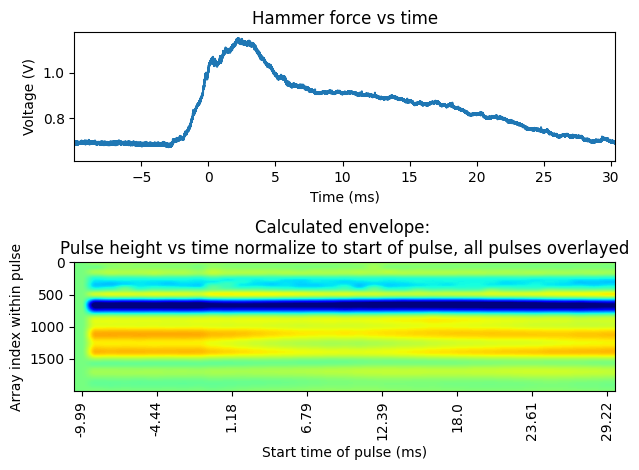

In [404]:
plt.subplot(2,1,1)
plt.plot(csv_times,csv_hammer)
plt.xlim(time_ticks[0], time_ticks[-1])
plt.title('Hammer force vs time')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (ms)')

plt.subplot(2,1,2)

new_arr = calculated_envelope_reshaped_cut-calculated_envelope_reshaped_cut[0,:]
#new_arr[0,0] = np.max(np.abs(new_arr))
#new_arr[0,1] = -1 * np.max(np.abs(new_arr))

lower_outliers, upper_outliers, lower_lim_imshow, upper_lim_imshow = find_outliers_std(new_arr)
plt.imshow(np.transpose(new_arr), aspect='auto', cmap='jet', vmin = lower_lim_imshow, vmax = upper_lim_imshow)

plt.title('Calculated envelope: \nPulse height vs time normalize to start of pulse, all pulses overlayed')
plt.ylabel('Array index within pulse')
plt.xlabel('Start time of pulse (ms)')

time_tick_positions = np.arange(0, NUM_PULSES, NUM_PULSES/len(time_ticks))
plt.xticks(ticks = time_tick_positions[0::5], labels = time_ticks[0::5])
plt.xticks(rotation=90)

plt.subplots_adjust(hspace = 0.5)
plt.tight_layout()